# Run analysis on 0 deg fine resolution grid 

In [1]:
%run -i ../tomography/utils.py

## Create the calculator

In [2]:
# this is the one that will hold the raw and processed data in attributes
C = Calculator()

## Load the Run Data

In [3]:
from databroker import catalog

list(catalog)

['test_data_in_database',
 'analysis',
 'bt_safN_306132',
 'pdf',
 'saf_307381',
 'xpd']

In [4]:
db = catalog["xpd"]

In [7]:
UID = '257b5581-ca78-4309-9c50-b4d65d80152a'
run = db[UID]
run

BlueskyRun
  uid='257b5581-ca78-4309-9c50-b4d65d80152a'
  exit_status='success'
  2021-03-19 22:48:19.253 -- 2021-03-19 23:13:41.753
  Streams:
    * primary


In [9]:
# load the dask array
# I terminate the data at 101 because this is an example and I don't want the data processing to be too slow
data = run.primary.to_dask()
data

<xarray.Dataset>
Dimensions:              (dim_0: 1, dim_1: 3888, dim_2: 3072, time: 1001)
Coordinates:
  * time                 (time) float64 1.616e+09 1.616e+09 ... 1.616e+09
Dimensions without coordinates: dim_0, dim_1, dim_2
Data variables:
    dexela_stats1_total  (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    dexela_image         (time, dim_0, dim_1, dim_2) float64 dask.array<chunksize=(1, 1, 3888, 3072), meta=np.ndarray>
    mPhi                 (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    mPhi_user_setpoint   (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>

In [10]:
C.frames_arr = data["dexela_image"][:101]
C.frames_arr

,Array,Chunk
Bytes,8.99 GiB,91.12 MiB
Shape,"(101, 1, 3888, 3072)","(1, 1, 3888, 3072)"
Count,3104 Tasks,101 Chunks
Type,float64,numpy.ndarray


In [6]:
# show the metadata
metadata = dict(run.metadata["start"])
# Because I terminate the data. I nedd to update the metadata.
metadata["shape"] = [101]
metadata["extents"] = ([-0.5, -0.4],)
metadata

{'time': 1616208499.2537348,
 'uid': '257b5581-ca78-4309-9c50-b4d65d80152a',
 'versions': {'ophyd': '1.3.3', 'bluesky': '1.6.7'},
 'scan_id': 45,
 'proposal_id': '307690',
 'plan_type': 'generator',
 'plan_name': 'rel_grid_scan',
 'detectors': ['dexela'],
 'motors': ['mPhi'],
 'num_points': 1001,
 'num_intervals': 1000,
 'plan_args': {'detectors': ["XPDDDexelaDetector(prefix='XF:28IDD-ES:2{Det:DEX}', name='dexela', read_attrs=['stats1', 'stats1.total', 'tiff'], configuration_attrs=['cam', 'cam.acquire_period', 'cam.acquire_time', 'cam.image_mode', 'cam.trigger_mode', 'stats1', 'stats1.configuration_names', 'stats1.port_name', 'stats1.asyn_pipeline_config', 'stats1.blocking_callbacks', 'stats1.enable', 'stats1.nd_array_port', 'stats1.plugin_type', 'stats1.bgd_width', 'stats1.centroid_threshold', 'stats1.compute_centroid', 'stats1.compute_histogram', 'stats1.compute_profiles', 'stats1.compute_statistics', 'stats1.hist_max', 'stats1.hist_min', 'stats1.hist_size', 'stats1.profile_cursor', 

In [7]:
C.metadata = metadata
C.calc_coords()
C.coords

[array([-0.5  , -0.499, -0.498, -0.497, -0.496, -0.495, -0.494, -0.493,
        -0.492, -0.491, -0.49 , -0.489, -0.488, -0.487, -0.486, -0.485,
        -0.484, -0.483, -0.482, -0.481, -0.48 , -0.479, -0.478, -0.477,
        -0.476, -0.475, -0.474, -0.473, -0.472, -0.471, -0.47 , -0.469,
        -0.468, -0.467, -0.466, -0.465, -0.464, -0.463, -0.462, -0.461,
        -0.46 , -0.459, -0.458, -0.457, -0.456, -0.455, -0.454, -0.453,
        -0.452, -0.451, -0.45 , -0.449, -0.448, -0.447, -0.446, -0.445,
        -0.444, -0.443, -0.442, -0.441, -0.44 , -0.439, -0.438, -0.437,
        -0.436, -0.435, -0.434, -0.433, -0.432, -0.431, -0.43 , -0.429,
        -0.428, -0.427, -0.426, -0.425, -0.424, -0.423, -0.422, -0.421,
        -0.42 , -0.419, -0.418, -0.417, -0.416, -0.415, -0.414, -0.413,
        -0.412, -0.411, -0.41 , -0.409, -0.408, -0.407, -0.406, -0.405,
        -0.404, -0.403, -0.402, -0.401, -0.4  ])]

## Choose the Max image

In [8]:
C.calc_dark_and_light_from_frames_arr(index_range=slice(0, 101))

100%|██████████| 100/100 [00:44<00:00,  2.23it/s]


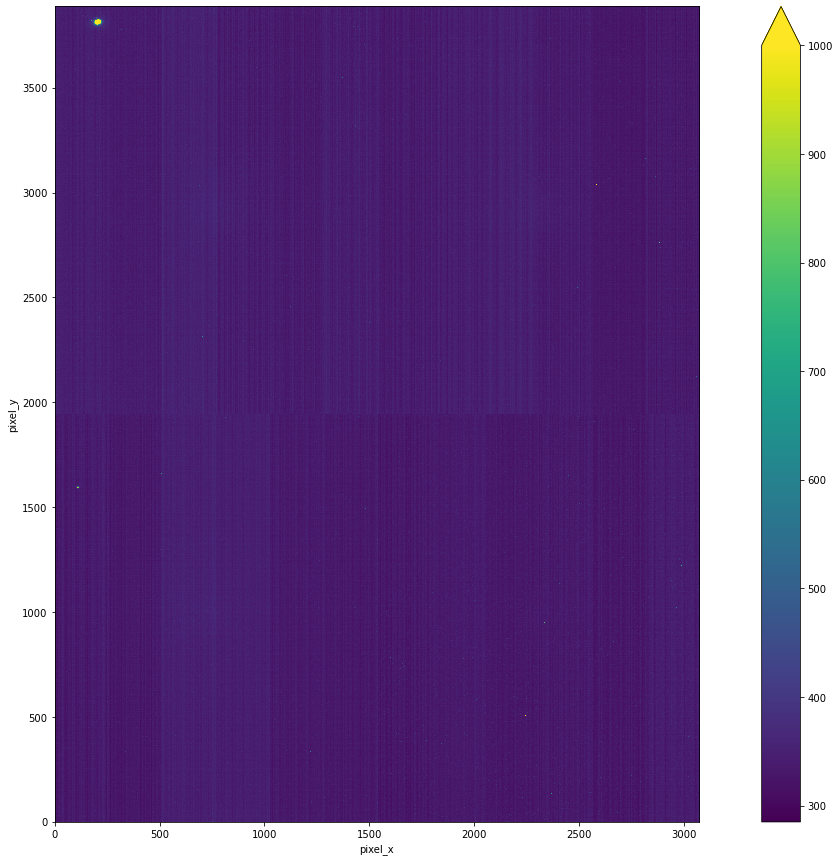

In [9]:
C.show_light(vmax=1000, size=15)

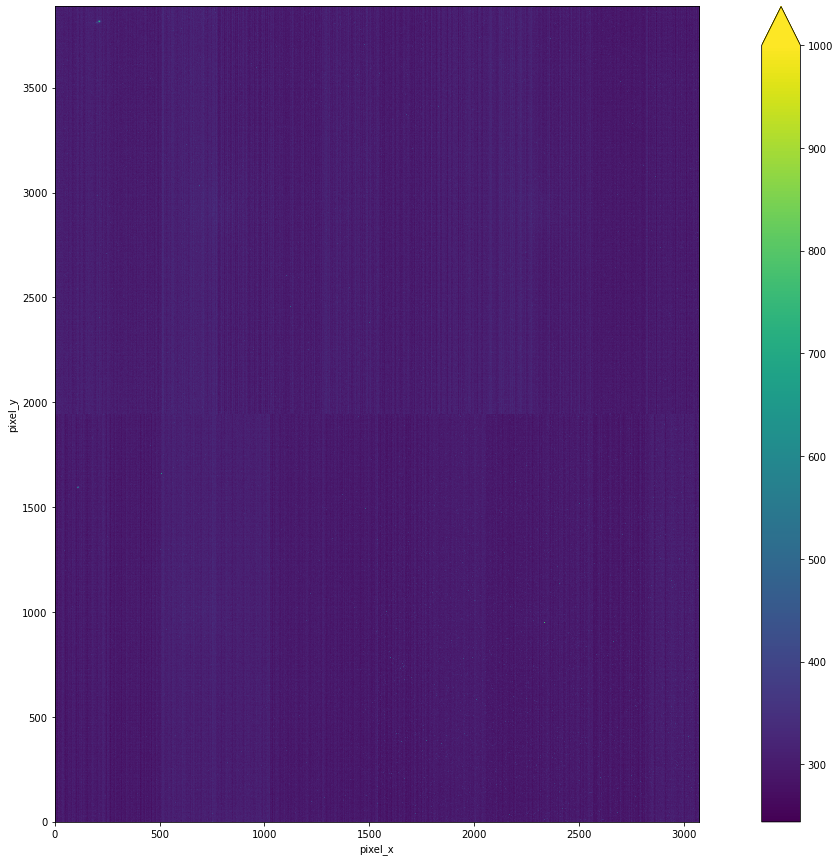

In [10]:
C.show_dark(vmax=1000, size=15)

## Locate the peaks and create windows

In [11]:
tp.locate?

Signature:
tp.locate(
    raw_image,
    diameter,
    minmass=None,
    maxsize=None,
    separation=None,
    noise_size=1,
    smoothing_size=None,
    threshold=None,
    invert=False,
    percentile=64,
    topn=None,
    preprocess=True,
    max_iterations=10,
    filter_before=None,
    filter_after=None,
    characterize=True,
    engine='auto',
)
Docstring:
Locate Gaussian-like blobs of some approximate size in an image.

Preprocess the image by performing a band pass and a threshold.
Locate all peaks of brightness, characterize the neighborhoods of the peaks
and take only those with given total brightness ("mass"). Finally,
refine the positions of each peak.

Parameters
----------
raw_image : array (any dimensions)
    Image used for final characterization. Ideally, pixel values of
    this image are not rescaled, but it can also be identical to
    ``image``.
image : array (same size as raw_image)
    Processed image used for centroid-finding and most particle
    measuremen

In [12]:
C.calc_peaks_from_dk_sub_frame(31, separation=100, threshold=20, topn=5)

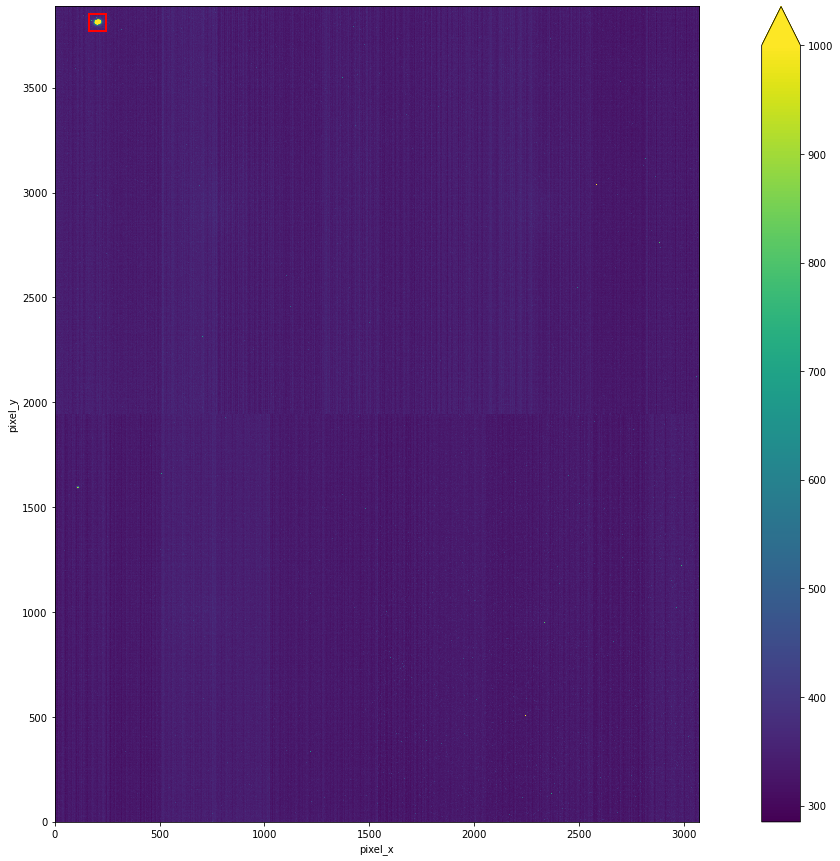

In [13]:
C.calc_windows_from_peaks(num=100, width=40)
C.show_windows(size=15, vmax=1000)

## Run throught the images to calculate the intensity in the windows

In [14]:
C.calc_intensity_in_windows()

100%|██████████| 101/101 [00:31<00:00,  3.16it/s]


In [15]:
# reshape the intensity
C.reshape_intensity()

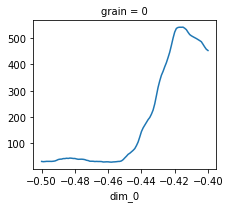

In [16]:
C.show_intensity()

## Calculate the Q values

In [17]:
import pyFAI
from  pyFAI.azimuthalIntegrator import AzimuthalIntegrator

PONI_FILE = ""
C.ai = pyFAI.load(PONI_FILE) if PONI_FILE else AzimuthalIntegrator(dist=400, wavelength=0.186, detector="dexela2923")
C.assign_q_values()
C.windows

,y,dy,x,dx,Q
0,3811,40,204,40,2.417621e-11


## Save the result

In [28]:
ds = C.to_dataset()
ds

<xarray.Dataset>
Dimensions:    (dim_0: 101, grain: 1, pixel_x: 3072, pixel_y: 3888)
Coordinates:
  * grain      (grain) int64 0
  * dim_0      (dim_0) float64 -0.5 -0.499 -0.498 -0.497 ... -0.402 -0.401 -0.4
Dimensions without coordinates: pixel_x, pixel_y
Data variables:
    dark       (pixel_y, pixel_x) float64 303.0 301.0 289.0 ... 294.0 306.0
    light      (pixel_y, pixel_x) float64 339.0 337.0 333.0 ... 332.0 350.0
    intensity  (grain, dim_0) float64 31.28 30.33 30.85 ... 466.8 457.8 453.1
    y          (grain) int64 3811
    dy         (grain) int64 40
    x          (grain) int64 204
    dx         (grain) int64 40
    Q          (grain) float64 2.418e-11
Attributes: (12/18)
    time:                 1616208499.2537348
    uid:                  257b5581-ca78-4309-9c50-b4d65d80152a
    scan_id:              45
    proposal_id:          307690
    plan_type:            generator
    plan_name:            rel_grid_scan
    ...                   ...
    snaking:              [False]
    plan_pattern:         outer_product
    plan_pattern_module:  bluesky.plan_patterns
    task:                 a single point rocking curve
    sample:               PARADIM-2
    beam:                 slit

In [27]:
OUT_FILE = "/Volumes/STAO_EXT/data_21st_tomology/{}_{}.nc".format(C.metadata["sample"], C.metadata["uid"])
ds.attrs = {}
ds.to_netcdf(OUT_FILE)

## Visualize the result

In [ ]:
ds = xr.load_dataset(OUT_FILE)

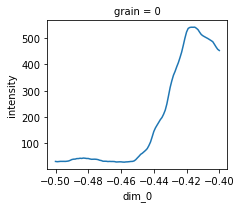

In [23]:
auto_plot(ds["intensity"])
plt.show()